In [1]:
import sys
sys.path.append("../")
import rg
from rg.graph import incidence_matrix
from rg.graph import ring_diagram ,show_spanning_trees
from rg.graph import circuits, set_circuit_flow,set_source_sink_flow,apply_flow
from rg.graph import scalar_propagator
#for inline dev
import numpy as np
from sympy import *
init_printing()

# Tasks 
 - (a) make sure the integral formula is solid and then should work for any order
 - (b) some clean up on the K polynomials should be done but not a show stopper
 - (c) some enumerations for finding patterns at one then two loop and S species 

# Some one loop examples of omega-integration

# 1 
This is one of the simplest examples

In [2]:
mat = [[0,-1,0,1,1,],
       [0,1,0,0,0,1]]
factors = scalar_propagator.from_basis_vector(mat,2)
IG = rg.integral(factors)
IG

$\frac{1}{\left(D_{a} k_{1}^{2} + m_{a}^{2} + i \omega_{1}\right) \left(D_{b} k_{1}^{2} + m_{b}^{2} - i \omega_{1}\right)}$

In [3]:
IG.integrate()

$\frac{1}{D_{a} k_{1}^{2} + D_{b} k_{1}^{2} + m_{a}^{2} + m_{b}^{2}}$

# 2 
example pole order 2 with externa momentum (freq)

In [4]:
mat = [[0,1,0,1,0,1],
       [0,-1,0,0,0,2]]
factors = scalar_propagator.from_basis_vector(mat,2)
IG = rg.integral(factors)
IG

$\frac{1}{\left(D_{a} k_{1}^{2} + m_{a}^{2} - i \omega_{1}\right)^{2} \left(D_{a} \left(k'_{1} + k_{1}\right)^{2} + i \omega'_1 + m_{a}^{2} + i \omega_{1}\right)}$

In [5]:
IG.integrate()

$\frac{1}{\left(D_{a} k_{1}^{2} + D_{a} \left(k'_{1} + k_{1}\right)^{2} + i \omega'_1 + 2 m_{a}^{2}\right)^{2}}$

# 3 

Example poles of higher order

In [6]:
mat = [[0,-1,0,1,0,5],
       [0,1,0,0,0,2]]
factors = scalar_propagator.from_basis_vector(mat,2)
IG = rg.integral(factors)
IG.integrate()


$\frac{1}{12 \left(D_{a} k_{1}^{2} + D_{a} \left(k'_{1} + k_{1}\right)^{2} + i \omega'_1 + 2 m_{a}^{2}\right)^{3}}$

# 4 
Example introducing new species

In [7]:
mat = [[0,-1,0,1,0,1],
       [0,1,0,1,1,1],
       [0,1,0,0,0,1]
      ]
factors = scalar_propagator.from_basis_vector(mat,2)
IG = rg.integral(factors)
IG

$\frac{1}{\left(D_{a} k_{1}^{2} + m_{a}^{2} + i \omega_{1}\right) \left(D_{a} \left(k'_{1} + k_{1}\right)^{2} + i \omega'_1 + m_{a}^{2} - i \omega_{1}\right) \left(D_{b} \left(k'_{1} + k_{1}\right)^{2} + i \omega'_1 + m_{b}^{2} + i \omega_{1}\right)}$

In [8]:
IG.integrate()

$\frac{1}{\left(D_{a} k_{1}^{2} + D_{a} \left(k'_{1} + k_{1}\right)^{2} + i \omega'_1 + 2 m_{a}^{2}\right) \left(D_{a} \left(k'_{1} + k_{1}\right)^{2} + D_{b} \left(k'_{1} + k_{1}\right)^{2} + 2 i \omega'_1 + m_{a}^{2} + m_{b}^{2}\right)}$

# Some two loop examples of omega-integration

In [9]:
sunset = incidence_matrix(3,2,
                       [ [0,1], [1,0], [0,1]  ],
                       external_vertices=[0,1])
ring_diagram(sunset,options={"show_labels"})

In [10]:
#if the loop integral has species colours, we have the option of the extended basis
#we can colour the edges too - go to rg.colour_map

In [23]:
L = sunset.first_betti_number
maps = sunset.edges_to_loop_basis()
factor = rg._product_([scalar_propagator(maps[i][:L], maps[i][L:]).value for i in maps.keys()])
IG = rg.integral(factor)
IG

$\frac{1}{\left(D_{a} k_{0}^{2} + m_{a}^{2} + i \omega_{0}\right) \left(D_{a} k_{1}^{2} + m_{a}^{2} + i \omega_{1}\right) \left(D_{a} \left(k_{0} + k_{1}\right)^{2} + m_{a}^{2} + i \omega_{0} + i \omega_{1}\right)^{2} \left(D_{a} \left(k'_{1} + k_{0} + k_{1}\right)^{2} - i \omega'_1 + m_{a}^{2} - i \omega_{0} - i \omega_{1}\right)}$

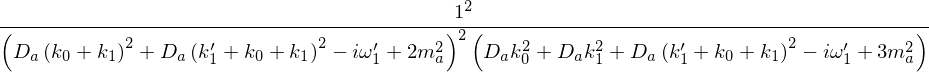

In [24]:
#this does not seem that believable unless the sunset is a special case for two-loop
IG.integrate()

In [14]:
## more.... 

In [19]:
bobcut = incidence_matrix(5,4,
                       [ [0,1], [1,3], [2,0], [3,2],[2,3] ],
                       external_vertices=[0,1])
ring_diagram(bobcut,options={"show_labels"})
#i know why the drawing is trying to create e1 which i can easily fix but how are the pids lining up?

In [20]:
maps = bobcut.edges_to_loop_basis()
factor = rg._product_([scalar_propagator(maps[i][:L], maps[i][L:]).value for i in maps.keys()])
IG = rg.integral(factor)
IG

$\frac{1}{\left(D_{a} k_{0}^{2} + m_{a}^{2} + i \omega_{0}\right) \left(D_{a} k_{1}^{2} + m_{a}^{2} + i \omega_{1}\right) \left(D_{a} \left(k_{0} + k_{1}\right)^{2} + m_{a}^{2} + i \omega_{0} + i \omega_{1}\right)^{2} \left(D_{a} \left(k'_{1} + k_{0} + k_{1}\right)^{2} - i \omega'_1 + m_{a}^{2} - i \omega_{0} - i \omega_{1}\right)}$

In [21]:
IG.integrate()

$\frac{1^{2}}{\left(D_{a} \left(k_{0} + k_{1}\right)^{2} + D_{a} \left(k'_{1} + k_{0} + k_{1}\right)^{2} - i \omega'_1 + 2 m_{a}^{2}\right)^{2} \left(D_{a} k_{0}^{2} + D_{a} k_{1}^{2} + D_{a} \left(k'_{1} + k_{0} + k_{1}\right)^{2} - i \omega'_1 + 3 m_{a}^{2}\right)}$